IMPORT LIBRARIES

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gc
import datetime
import warnings
import missingno as msno
%matplotlib inline

color = sns.color_palette()
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')


LOAD DATASETS

In [6]:
# Load datasets
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

In [7]:
# Basic dataset information
print("Customers Dataset Overview:")
print(customers.info())
print("\nProducts Dataset Overview:")
print(products.info())
print("\nTransactions Dataset Overview:")
print(transactions.info())

Customers Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 colu

MERGING DATASETS

In [8]:
# Merge datasets for analysis
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [9]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [11]:
data.shape

(1000, 13)

DATA CLEANING

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


Check for Missing Values

In [ ]:
# Check for missing values
print("\nMissing Values in Data:")
print(data.isnull().sum())


Missing Values in Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


EDA (Exploratory Data Analysis)

In [ ]:
# EDA: Summary statistics
print(data.describe())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


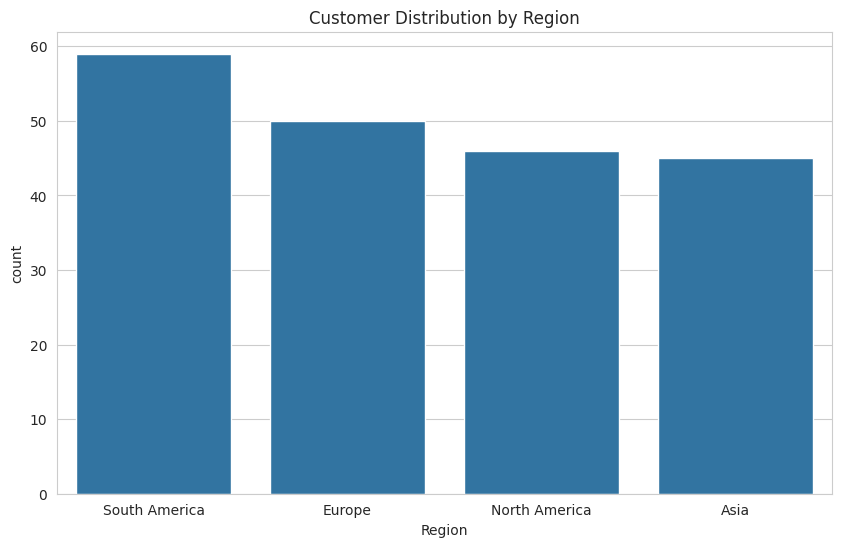

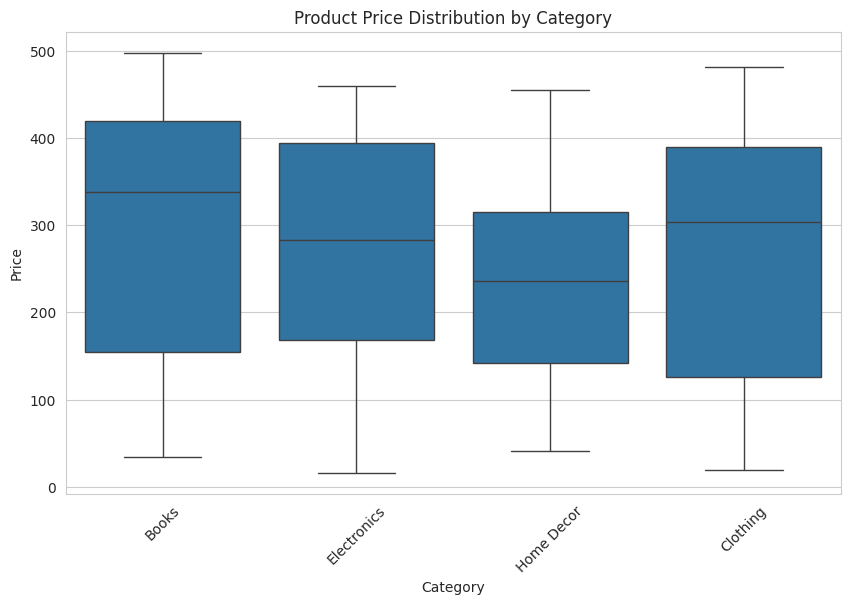

In [17]:
# EDA: Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index)
plt.title('Customer Distribution by Region')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=products, x='Category', y='Price')
plt.title('Product Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

**INSIGHTS**

In [18]:
# Convert 'TransactionDate' to datetime for time-based analysis
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])


Insight 1: Sales by Region


Insight 1: Total Sales by Region
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


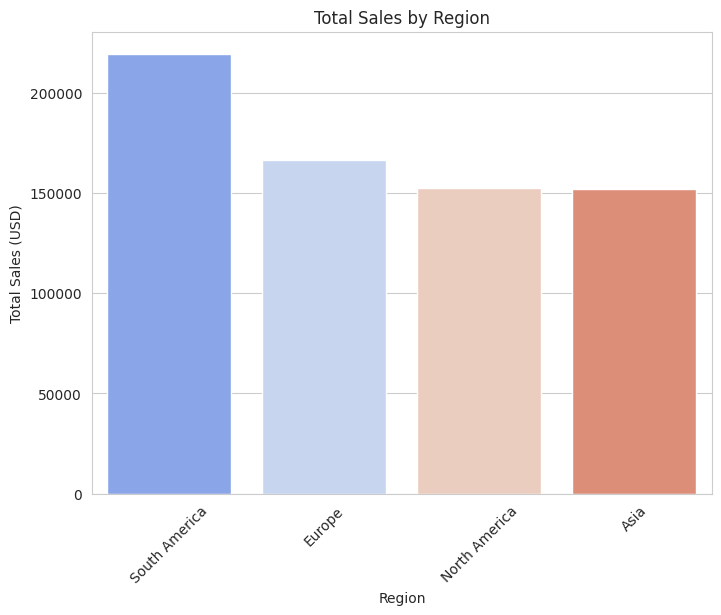

In [19]:
# Insight 1: Sales by Region
region_sales = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nInsight 1: Total Sales by Region")
print(region_sales)

plt.figure(figsize=(8, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")
plt.title("Total Sales by Region")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

Insight 2: Top 10 Products by Quantity Sold


Insight 2: Top 10 Products by Quantity Sold
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


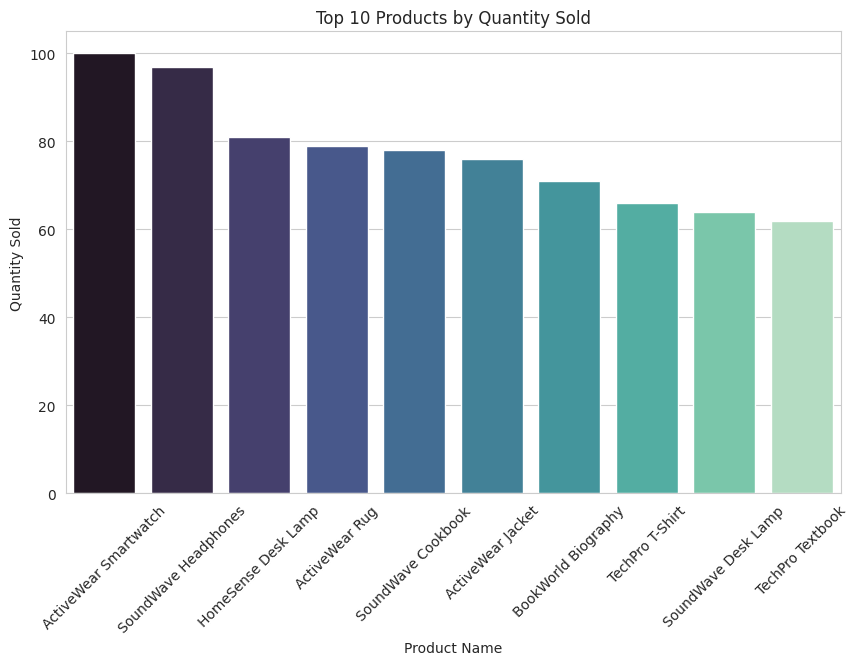

In [20]:
# Insight 2: Top-Selling Products by Quantity
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nInsight 2: Top 10 Products by Quantity Sold")
print(top_products)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette="mako")
plt.title("Top 10 Products by Quantity Sold")
plt.ylabel("Quantity Sold")
plt.xlabel("Product Name")
plt.xticks(rotation=45)
plt.show()


Insight 3: Monthly Sales Trend


Insight 3: Monthly Sales Trend
Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


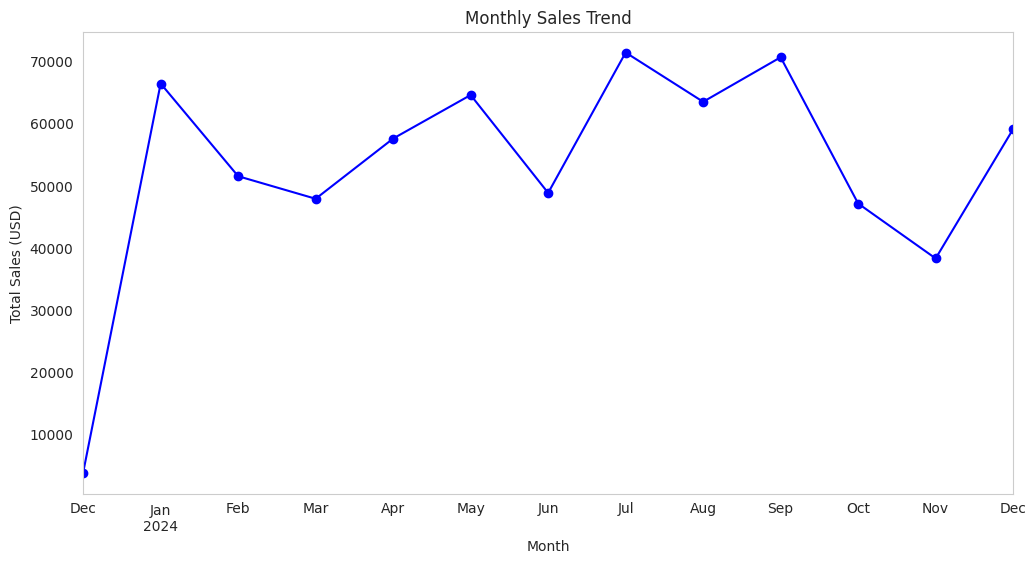

In [21]:
# Insight 3: Monthly Sales Trend
data['Month'] = data['TransactionDate'].dt.to_period('M')
monthly_sales = data.groupby('Month')['TotalValue'].sum()
print("\nInsight 3: Monthly Sales Trend")
print(monthly_sales)

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Month")
plt.grid()
plt.show()


Insight 4: Average Quantity Per Transaction by Region


Insight 4: Average Quantity Per Transaction by Region
Region
South America    2.595395
Asia             2.568807
Europe           2.542735
North America    2.430328
Name: Quantity, dtype: float64


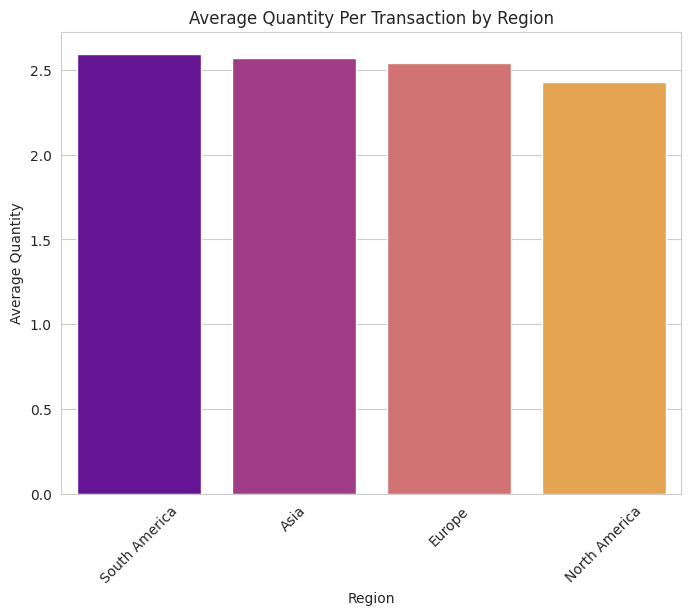

In [22]:
# Insight 4: Customer Behavior by Region (Average Quantity Per Transaction)
region_avg_quantity = data.groupby('Region')['Quantity'].mean().sort_values(ascending=False)
print("\nInsight 4: Average Quantity Per Transaction by Region")
print(region_avg_quantity)

plt.figure(figsize=(8, 6))
sns.barplot(x=region_avg_quantity.index, y=region_avg_quantity.values, palette="plasma")
plt.title("Average Quantity Per Transaction by Region")
plt.ylabel("Average Quantity")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()


Insight 5: Category Contribution to Revenue


Insight 5: Revenue Contribution by Product Category
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


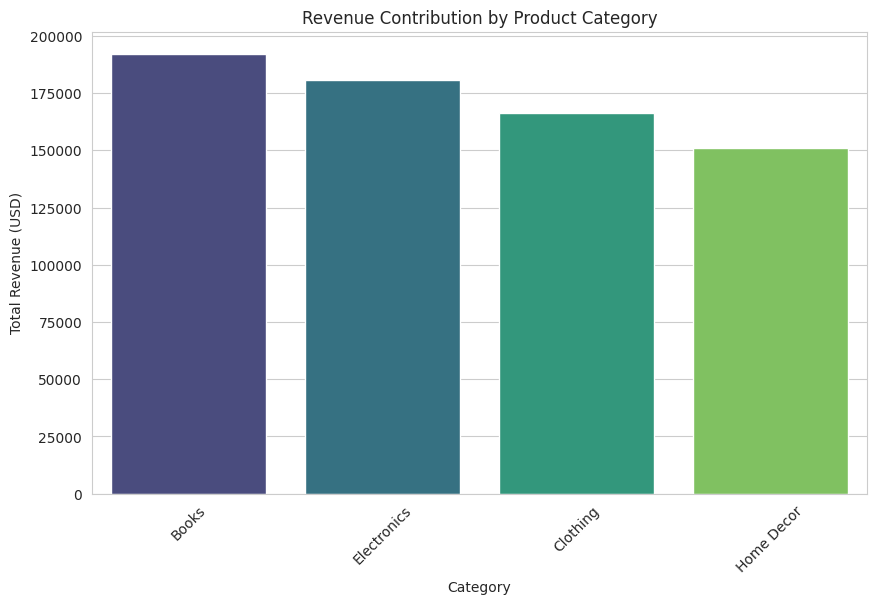

In [23]:
# Insight 5: Category Contribution to Revenue
category_revenue = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nInsight 5: Revenue Contribution by Product Category")
print(category_revenue)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="viridis")
plt.title("Revenue Contribution by Product Category")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()